# Exercise Solutions - Day 8
*August 8, 2024*

*I School Python Bootcamp*

*Author: Lauren Chambers*

## Lab 8A - Data Analysis with `numpy` and `pandas`

### Exercise 1
Create a numpy array with 20 elements that are evenly spaced between 0 and 10. *Hint: Use either np.arange() or np.linspace() - do you remember the difference?*

1. Calculate the sine of each element using `np.sin()`
2. Do the same with `np.exp()` and `np.log()`
1. Use `matplotlib` to create a figure with three subplots; plot the sine in the first, the exponential in the second, and the logarithmic in the last.

In [82]:
arr = np.arange(0, 10, .5)
arr

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [84]:
np.sin(arr)

array([ 0.        ,  0.47942554,  0.84147098,  0.99749499,  0.90929743,
        0.59847214,  0.14112001, -0.35078323, -0.7568025 , -0.97753012,
       -0.95892427, -0.70554033, -0.2794155 ,  0.21511999,  0.6569866 ,
        0.93799998,  0.98935825,  0.79848711,  0.41211849, -0.07515112])

In [48]:
np.exp(arr)

array([1.00000000e+00, 1.64872127e+00, 2.71828183e+00, 4.48168907e+00,
       7.38905610e+00, 1.21824940e+01, 2.00855369e+01, 3.31154520e+01,
       5.45981500e+01, 9.00171313e+01, 1.48413159e+02, 2.44691932e+02,
       4.03428793e+02, 6.65141633e+02, 1.09663316e+03, 1.80804241e+03,
       2.98095799e+03, 4.91476884e+03, 8.10308393e+03, 1.33597268e+04])

In [49]:
np.log(arr)

/var/folders/_l/m1t5fd6s2yn3409p5pl_8q7c0000gn/T/ipykernel_29538/3120950136.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(arr)


array([       -inf, -0.69314718,  0.        ,  0.40546511,  0.69314718,
        0.91629073,  1.09861229,  1.25276297,  1.38629436,  1.5040774 ,
        1.60943791,  1.70474809,  1.79175947,  1.87180218,  1.94591015,
        2.01490302,  2.07944154,  2.14006616,  2.19722458,  2.2512918 ])

/var/folders/_l/m1t5fd6s2yn3409p5pl_8q7c0000gn/T/ipykernel_29538/754389939.py:5: RuntimeWarning: divide by zero encountered in log
  ax3.plot(arr, np.log(arr))


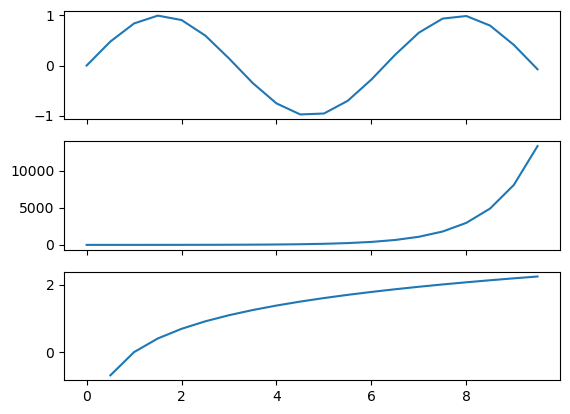

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

ax1.plot(arr, np.sin(arr))
ax2.plot(arr, np.exp(arr))
ax3.plot(arr, np.log(arr))

plt.show()

## Exercise 2

Load the `countries.csv` file using `pd.read_csv()`.

1. Using `pandas`, print the unique values in the `continent` column. Try finding a `pd` function that will let you do this without using  `set`!
1. Calculate the mean GDP per capita across *all* countries for each year. (You'll probably want to use a for loop for this.)
1. Use `matplotlib` to plot the mean worldwide GDP over time.
1. For each year, determine the country with the highest life expectancy.
1. Just as in Lab 4A, add a new column to the dataframe: the raw GDP, as opposed to the per capita. (`gdp = pop * gdpPercap`)
1. Use bracket notation to display only the Year, GDP, GDP Per Capita, and Country columns.

In [61]:
countries_df = pd.read_csv("countries.csv")
countries_df

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


In [53]:
countries_df.continent.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [86]:
years = countries_df.year.unique()
years

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [57]:
gdps = []
for y in years:
    data = countries_df[countries_df.year == y]
    gdps.append(data.gdpPercap.mean())
gdps

[3725.2760457992963,
 4299.408344876057,
 4725.812341961972,
 5466.6161696828585,
 6699.029292837588,
 7313.166420794366,
 7567.425926649646,
 7845.146722110639,
 8210.61508853759,
 9145.147698755318,
 9905.71687117305,
 11776.225616419286]

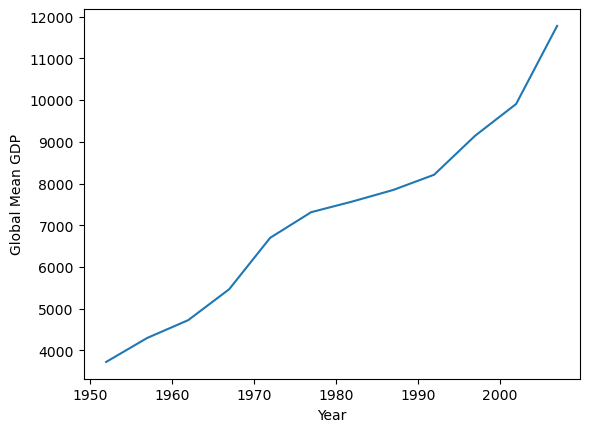

In [59]:
plt.figure()
plt.plot(years, gdps)
plt.xlabel("Year")
plt.ylabel("Global Mean GDP")
plt.show()

In [88]:
for y in years:
    data = countries_df[countries_df.year == y]
    maxLE_country = data[data.lifeExp == data.lifeExp.max()].country.item()
    print("{} has the highest life expectancy in {}.".format(maxLE_country, y))

Norway has the highest life expectancy in 1952.
Iceland has the highest life expectancy in 1957.
Iceland has the highest life expectancy in 1962.
Sweden has the highest life expectancy in 1967.
Sweden has the highest life expectancy in 1972.
Iceland has the highest life expectancy in 1977.
Japan has the highest life expectancy in 1982.
Japan has the highest life expectancy in 1987.
Japan has the highest life expectancy in 1992.
Japan has the highest life expectancy in 1997.
Japan has the highest life expectancy in 2002.
Japan has the highest life expectancy in 2007.


In [90]:
countries_df["gdp"] = countries_df.gdpPercap * countries_df['pop']
countries_df

,country,year,pop,continent,lifeExp,gdpPercap,gdp
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,6.567086e+09
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,7.585449e+09
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,8.758856e+09
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,9.648014e+09
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,9.678553e+09
...,...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306,6.508241e+09
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786,7.422612e+09
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960,9.037851e+09
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623,8.015111e+09


In [77]:
countries_df[["year", "gdp", "gdpPercap", "country"]]

,year,gdp,gdpPercap,country
0,1952,6.567086e+09,779.445314,Afghanistan
1,1957,7.585449e+09,820.853030,Afghanistan
2,1962,8.758856e+09,853.100710,Afghanistan
3,1967,9.648014e+09,836.197138,Afghanistan
4,1972,9.678553e+09,739.981106,Afghanistan
...,...,...,...,...
1699,1987,6.508241e+09,706.157306,Zimbabwe
1700,1992,7.422612e+09,693.420786,Zimbabwe
1701,1997,9.037851e+09,792.449960,Zimbabwe
1702,2002,8.015111e+09,672.038623,Zimbabwe


## Bonus Exercise
1. Use `np.random.random(shape)` to generate a 100 x 100 array of random values.
1. Let's use `matplotlib` to visualize this 2D data. (Surprise!) Use the `plt.imshow(data)`, where you pass in your numpy array as the data, and see what it looks like. Fun, huh?
1. Reshape the array to a 200 x 50 array, then plot it again.

In [78]:
arr = np.random.random((100, 100))

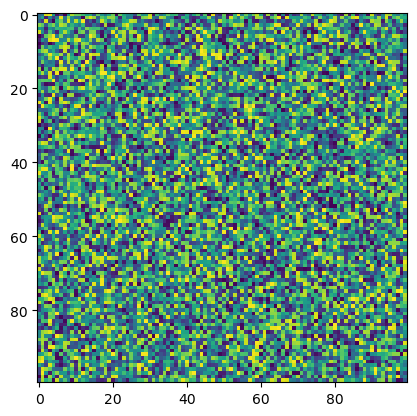

In [79]:
plt.figure()
plt.imshow(arr)
plt.show()

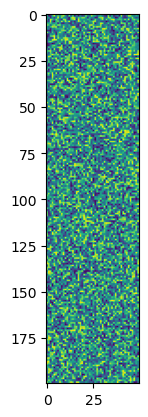

In [80]:
arr2 = np.reshape(arr, (200, 50))
plt.imshow(arr2)
plt.show()